## Importando Bibliotecas e Dados

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Definir as ações
ticker1 = "CSNA3.SA"
dolar = "USDBRL=X"

# Definir as datas inicial e final
data_inicial = "2017-01-01"
data_final = "2022-12-31"

# Baixar os dados históricos
dados_csna = yf.download(ticker1, data_inicial, data_final)
cotacao_dolar = yf.download(dolar, data_inicial, data_final)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
dados_csna

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,10.70,10.94,10.61,10.86,7.050704,1127100
2017-01-03,11.07,11.42,10.91,11.42,7.414277,6602900
2017-01-04,11.35,11.55,11.14,11.31,7.342862,5117300
2017-01-05,11.45,11.88,11.36,11.70,7.596063,4523400
2017-01-06,11.71,11.74,11.22,11.28,7.323384,4090800
...,...,...,...,...,...,...
2022-12-23,14.17,14.17,13.66,13.91,12.817846,9012400
2022-12-26,14.10,14.29,13.95,14.14,13.029787,10103600
2022-12-27,14.25,14.54,14.10,14.46,13.324662,12826700


##Preparação dos Dados

In [ ]:
# Criar a nova coluna Movimento 7 dias
dados_csna["Movimento_7"] = dados_csna["Close"].rolling(window=7).mean() > dados_csna["Close"].shift(7)

In [ ]:
# Converter os valores True e False para 0 e 1
dados_csna["Movimento_7"] = (dados_csna["Movimento_7"] == True).astype(int)

In [ ]:
dados = pd.merge(dados_csna, cotacao_dolar, on="Date")

In [ ]:
dados

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Movimento_7,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
Date,,,,,,,,,,,,,
2017-01-02,10.70,10.94,10.61,10.86,7.050704,1127100,0,3.2532,3.279700,3.242700,3.2532,3.2532,0
2017-01-03,11.07,11.42,10.91,11.42,7.414277,6602900,0,3.2841,3.289700,3.247500,3.2840,3.2840,0
2017-01-04,11.35,11.55,11.14,11.31,7.342862,5117300,0,3.2635,3.264300,3.218800,3.2635,3.2635,0
2017-01-05,11.45,11.88,11.36,11.70,7.596063,4523400,0,3.2149,3.227600,3.199800,3.2141,3.2141,0
2017-01-06,11.71,11.74,11.22,11.28,7.323384,4090800,0,3.1975,3.211800,3.189400,3.1977,3.1977,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.17,14.17,13.66,13.91,12.817846,9012400,0,5.1656,5.175000,5.116316,5.1656,5.1656,0
2022-12-26,14.10,14.29,13.95,14.14,13.029787,10103600,1,5.1643,5.204200,5.162500,5.1643,5.1643,0
2022-12-27,14.25,14.54,14.10,14.46,13.324662,12826700,1,5.2175,5.291600,5.124977,5.2175,5.2175,0


In [ ]:
# Criar a coluna fechamento
dados["fechamento"] = pd.to_numeric(dados["Close_x"])

# Separar as colunas de entrada e saída
X = dados[["Close_x"]]
y = dados["fechamento"]

# Normalizar os dados
X = (X - X.mean()) / X.std()

In [ ]:
dados

,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Movimento_7,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,fechamento
Date,,,,,,,,,,,,,,
2017-01-02,10.70,10.94,10.61,10.86,7.050704,1127100,0,3.2532,3.279700,3.242700,3.2532,3.2532,0,10.86
2017-01-03,11.07,11.42,10.91,11.42,7.414277,6602900,0,3.2841,3.289700,3.247500,3.2840,3.2840,0,11.42
2017-01-04,11.35,11.55,11.14,11.31,7.342862,5117300,0,3.2635,3.264300,3.218800,3.2635,3.2635,0,11.31
2017-01-05,11.45,11.88,11.36,11.70,7.596063,4523400,0,3.2149,3.227600,3.199800,3.2141,3.2141,0,11.70
2017-01-06,11.71,11.74,11.22,11.28,7.323384,4090800,0,3.1975,3.211800,3.189400,3.1977,3.1977,0,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.17,14.17,13.66,13.91,12.817846,9012400,0,5.1656,5.175000,5.116316,5.1656,5.1656,0,13.91
2022-12-26,14.10,14.29,13.95,14.14,13.029787,10103600,1,5.1643,5.204200,5.162500,5.1643,5.1643,0,14.14
2022-12-27,14.25,14.54,14.10,14.46,13.324662,12826700,1,5.2175,5.291600,5.124977,5.2175,5.2175,0,14.46


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Separar os dados de treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, shuffle=False)

##Montando o modelo de Regressão Polinomial

In [ ]:
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression

In [ ]:
# Criar um modelo de regressão linear
modelo = LassoLars(alpha=0.1)

In [ ]:
# Adicionar termos polinomiais
transformador = PolynomialFeatures(degree=3)
X_treinamento_transformado = transformador.fit_transform(X_treinamento)
X_teste_transformado = transformador.transform(X_teste)

In [ ]:
# Treinar o modelo nos dados de treinamento
modelo.fit(X_treinamento_transformado, y_treinamento)

In [ ]:
predicoes = modelo.predict(X_teste_transformado)

# Avaliar o desempenho do modelo
rmse = np.sqrt(mean_squared_error(y_teste, predicoes))
mae = mean_absolute_error(y_teste, predicoes)
mse = mean_squared_error(y_teste, predicoes)
r2 = r2_score(y_teste, predicoes)

# Imprimir o RMSE e o MAE
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)

MSE: 0.04388935946080795
MAE: 0.16411759431557293
RMSE: 0.2094978745973523
R^2: 0.9983706615680115


In [ ]:
# Fazer previsões usando o modelo
predicoes = modelo.predict(X_teste_transformado)

# Comparar os dados reais e as previsões
df = pd.DataFrame({
    "real": y_teste,
    "previsao": predicoes
})

print(df.head(15))

                 real   previsao
Date                            
2021-10-21  25.070000  24.762628
2021-10-22  25.090000  24.782218
2021-10-25  26.100000  25.772450
2021-10-26  24.430000  24.136158
2021-10-27  24.500000  24.204643
2021-10-28  24.040001  23.754744
2021-10-29  22.780001  22.524073
2021-11-01  23.150000  22.885223
2021-11-03  22.090000  21.851048
2021-11-04  21.330000  21.110383
2021-11-05  21.240000  21.022712
2021-11-08  21.690001  21.461147
2021-11-09  21.309999  21.090899
2021-11-10  21.170000  20.954530
2021-11-11  22.750000  22.494798


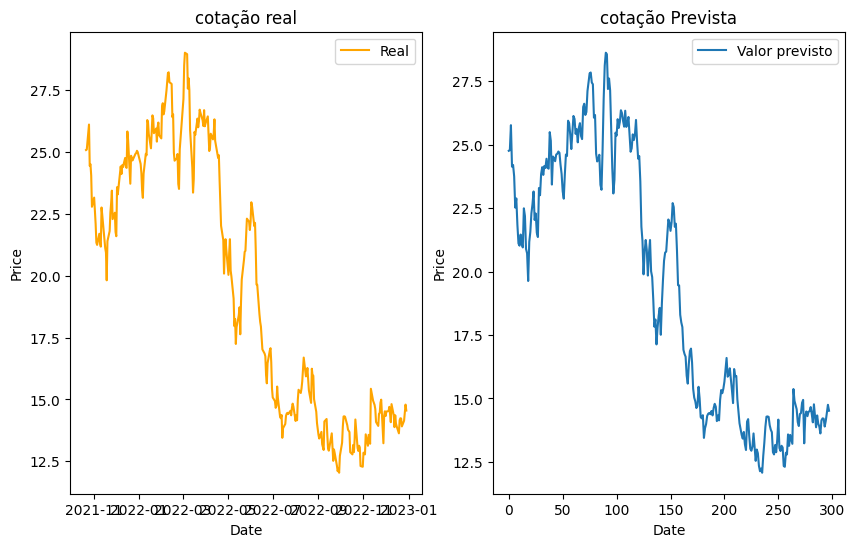

In [ ]:
dados_csna_final = dados['Close_x'][-298:]
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot dos dados
ax[0].plot(dados_csna_final, label= 'Real', color='orange')
ax[0].set_title('cotação real')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].legend()

ax[1].plot(predicoes, label="Valor previsto")
ax[1].set_title('cotação Prevista')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[1].legend()
plt.show()